## The Question: Do developing or developed nations produce more power per capita? ##
- Carly

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

global_power_path = "Resources/global_power_plant_database.csv"
global_gni_path = "Resources/Global_gni.csv"
global_population_path = "Resources/global_population_dataset.csv"

global_powerdf = pd.read_csv(global_power_path)
global_gnidf = pd.read_csv(global_gni_path)
global_population = pd.read_csv(global_population_path)

#global_gnidf.head()

C:\Users\carly\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [194]:
#global_powerdf.head()

In [195]:
global_population.head

global_population_cleandf = global_population[['Country Name', 'Country Code', '2020']]

#global_population_cleandf.head()

In [196]:
global_power_cleandf = global_powerdf[['country', 'country_long', 'name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel' ]]

global_power_cleandf.rename(columns={'country_long': 'Country Name',  'country': 'Country Code'}, inplace=True)

#global_power_cleandf.head()

C:\Users\carly\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [197]:
global_gni_cleandf = global_gnidf[['Country Name', 'Country Code', '2020']]
global_gni_cleandf = global_gni_cleandf.dropna()
#global_gni_cleandf.head()

In [198]:
merged_power_plantdf = pd.merge(global_power_cleandf, global_gni_cleandf, how="left", on=["Country Code", "Country Code"])
merged_power_plantdf.head(50)

merged_power_plantdf =  merged_power_plantdf[['Country Code', 'Country Name_x', 'name', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', '2020']]

#merged_power_plantdf.head()

In [199]:
merged_power_plantdf.rename(columns={'Country Name_x': 'Country Name',  '2020': 'GNI', 'capacity_mw': 'Power Plant Capacity(MWh)', 'latitude': 'Latitude',
'longitude': 'Longitude', 'name': 'Power Plant Name', 'primary_fuel': 'Primary Fuel'}, inplace=True)
#merged_power_plantdf.head()

In [200]:
merged_power_plantdf = pd.merge(merged_power_plantdf, global_population_cleandf, how="left", on=["Country Code", "Country Code"])
#merged_power_plantdf.head()

In [201]:
merged_power_plantdf.columns

merged_power_plantdf = merged_power_plantdf[['Country Code', 'Country Name_x', 'Power Plant Name',
       'Power Plant Capacity(MWh)', 'Latitude', 'Longitude', 'Primary Fuel', 'GNI', '2020']]

#merged_power_plantdf.head()

In [202]:
merged_power_plantdf.rename(columns={'Country Name_x': 'Country Name',  '2020': 'Population'}, inplace=True)

merged_power_plantdf.head()

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,500.0,38928341.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,500.0,38928341.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,500.0,38928341.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,500.0,38928341.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,500.0,38928341.0


In [203]:
#> 12615 - developing country
#< 12615 = developed country

merged_power_plantdf['GNI'].max()

bins = [0 , 12614, 83000]
group_Labels = ['Developing', 'Developed']

#pd.cut(merged_power_plantdf["GNI"], bins, labels=group_Labels).head()

In [204]:
merged_power_plantdf["Country Status"] = pd.cut(merged_power_plantdf["GNI"], bins, labels=group_Labels)
#merged_power_plantdf.head()

In [205]:
# Create new dataframe to work in.
power_plant_capacity_df = merged_power_plantdf
# power_plant_capacity_df

In [206]:
# Add a new column to calculate the MW capacity for a year 
# (so it's a more manageable number to work with when divided by the population)
# There are 8760 hours in a year.
power_plant_capacity_df["Power Plant Capacity(MW per Year)"] = ((power_plant_capacity_df["Power Plant Capacity(MWh)"]) * (8760))
power_plant_capacity_df

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status,Power Plant Capacity(MW per Year)
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,500.0,38928341.0,Developing,289080.0
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,500.0,38928341.0,Developing,87600.0
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,500.0,38928341.0,Developing,87600.0
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,500.0,38928341.0,Developing,578160.0
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,500.0,38928341.0,Developing,876000.0
...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,1160.0,18383956.0,Developing,438000.0
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,1160.0,18383956.0,Developing,175200.0
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,1160.0,18383956.0,Developing,946080.0
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,1140.0,14862927.0,Developing,8059200.0


In [207]:
# Group the data by the Country Code to get a total MW capacity for all of power plants in the country over the year.

# Reduce the table to just the necessary columns
power_plant_capacity_df_reduced = power_plant_capacity_df[["Country Code", "Power Plant Capacity(MW per Year)"]]

# Group by "Country Code"
power_plant_capacity_df_grouped = power_plant_capacity_df_reduced.groupby(["Country Code"], as_index=False)

# Get the sum of all "Power Plant Capacity(MW per Year)" values for each Country Code
power_plant_capacity_df_grouped = power_plant_capacity_df_grouped.sum()

power_plant_capacity_df_grouped

,Country Code,Power Plant Capacity(MW per Year)
0,AFG,2.632818e+06
1,AGO,9.383537e+06
2,ALB,1.339404e+07
3,ARE,2.656645e+08
4,ARG,2.883186e+08
...,...,...
162,VNM,3.622303e+08
163,YEM,9.154200e+06
164,ZAF,4.417029e+08
165,ZMB,2.355859e+07


In [208]:
# Merge the group by sum of all "Power Plant Capacity(MW per Year)" values for each Country Code dataframe with the power_plant_capacity_df under as a new variable
power_plant_capacity_merged_df = pd.merge(power_plant_capacity_df, power_plant_capacity_df_grouped, how="left", on=["Country Code", "Country Code"])
power_plant_capacity_merged_df

,Country Code,Country Name,Power Plant Name,Power Plant Capacity(MWh),Latitude,Longitude,Primary Fuel,GNI,Population,Country Status,Power Plant Capacity(MW per Year)_x,Power Plant Capacity(MW per Year)_y
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,500.0,38928341.0,Developing,289080.0,2632818.00
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,500.0,38928341.0,Developing,87600.0,2632818.00
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,500.0,38928341.0,Developing,87600.0,2632818.00
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,500.0,38928341.0,Developing,578160.0,2632818.00
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,500.0,38928341.0,Developing,876000.0,2632818.00
...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,1160.0,18383956.0,Developing,438000.0,23558592.12
34932,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,1160.0,18383956.0,Developing,175200.0,23558592.12
34933,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,1160.0,18383956.0,Developing,946080.0,23558592.12
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,1140.0,14862927.0,Developing,8059200.0,14629200.00


In [209]:
# clean up the power_plant_capacity_merged_df dataframe

power_plant_capacity_merged_df = power_plant_capacity_merged_df[['Country Name', 'Country Code', 'Country Status', 'GNI', 'Population', 'Power Plant Capacity(MW per Year)_y']]
power_plant_capacity_merged_df

,Country Name,Country Code,Country Status,GNI,Population,Power Plant Capacity(MW per Year)_y
0,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
1,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
2,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
3,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
4,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
...,...,...,...,...,...,...
34931,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34932,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34933,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34934,Zimbabwe,ZWE,Developing,1140.0,14862927.0,14629200.00


In [210]:
power_plant_capacity_merged_df.rename(columns={'Power Plant Capacity(MW per Year)_y': 'Countries Combined Power Plant Capacity (MW per Year)'}, inplace=True)

power_plant_capacity_merged_df

C:\Users\carly\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country Name,Country Code,Country Status,GNI,Population,Countries Combined Power Plant Capacity (MW per Year)
0,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
1,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
2,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
3,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
4,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00
...,...,...,...,...,...,...
34931,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34932,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34933,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12
34934,Zimbabwe,ZWE,Developing,1140.0,14862927.0,14629200.00


In [211]:
# Add a new column to calculate the Countries Combined Power Plant Capacity (MW per Year) divided by the population

power_plant_capacity_merged_df["Countries Combined Power Plant Capacity (MW per Year) Per Capita"] = ((power_plant_capacity_merged_df["Countries Combined Power Plant Capacity (MW per Year)"]) / (power_plant_capacity_merged_df["Population"]))
power_plant_capacity_merged_df

C:\Users\carly\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country Name,Country Code,Country Status,GNI,Population,Countries Combined Power Plant Capacity (MW per Year),Countries Combined Power Plant Capacity (MW per Year) Per Capita
0,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.067632
1,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.067632
2,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.067632
3,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.067632
4,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.067632
...,...,...,...,...,...,...,...
34931,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12,1.281476
34932,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12,1.281476
34933,Zambia,ZMB,Developing,1160.0,18383956.0,23558592.12,1.281476
34934,Zimbabwe,ZWE,Developing,1140.0,14862927.0,14629200.00,0.984274


In [212]:
country_power_capacity_per_capita_df = power_plant_capacity_merged_df.drop_duplicates()
country_power_capacity_per_capita_df = country_power_capacity_per_capita_df.dropna()
country_power_capacity_per_capita_df = country_power_capacity_per_capita_df.round(3)
country_power_capacity_per_capita_df

,Country Name,Country Code,Country Status,GNI,Population,Countries Combined Power Plant Capacity (MW per Year),Countries Combined Power Plant Capacity (MW per Year) Per Capita
0,Afghanistan,AFG,Developing,500.0,38928341.0,2.632818e+06,0.068
9,Albania,ALB,Developing,5210.0,2837743.0,1.339404e+07,4.720
17,Algeria,DZA,Developing,3570.0,43851043.0,1.390545e+08,3.171
76,Angola,AGO,Developing,2140.0,32866268.0,9.383537e+06,0.286
92,Argentina,ARG,Developing,9070.0,45376763.0,2.883186e+08,6.354
...,...,...,...,...,...,...,...
34543,Uruguay,URY,Developed,15790.0,3473727.0,3.687189e+07,10.615
34616,Uzbekistan,UZB,Developing,1740.0,34232050.0,1.107264e+08,3.235
34675,Vietnam,VNM,Developing,2650.0,97338583.0,3.622303e+08,3.721
34919,Zambia,ZMB,Developing,1160.0,18383956.0,2.355859e+07,1.281


Find the summary stats of Developing vs Developed Countries

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the:
# "Countries Combined Power Plant Capacity (MW per Year) Per Capita" for each "Country Status"

# use groupby function to calculate all required statistics
cpcpc_summary_stats_df = country_power_capacity_per_capita_df.groupby(["Country Status"]).agg({"Countries Combined Power Plant Capacity (MW per Year) Per Capita": ["mean", "median", "var", "std", "sem"]})

# re-align the headings so the columns headings can be re-named
cpcpc_summary_stats_df.columns = cpcpc_summary_stats_df.columns.droplevel(0)
cpcpc_summary_stats_df.rename(columns={"mean": "Mean MW of Power Per Person Per Year","median": "Median MW of Power Per Person Per Year", "var": "MW of Power Per Person Per Year Variance", "std": "MW of Power Per Person Per Year Standard Deviation", "sem": "MW of Power Per Person Per Year SEM",}, inplace=True)

cpcpc_summary_stats_df = cpcpc_summary_stats_df.round(2)

cpcpc_summary_stats_df

,Mean MW of Power Per Person Per Year,Median MW of Power Per Person Per Year,MW of Power Per Person Per Year Variance,MW of Power Per Person Per Year Standard Deviation,MW of Power Per Person Per Year SEM
Country Status,,,,,
Developing,3.16,1.73,13.23,3.64,0.35
Developed,17.38,13.30,126.62,11.25,1.68


Lets look at what outliers we may find with a box plot

In [ ]:
# Generate a box plot of the "Countries Combined Power Plant Capacity (MW per Year) Per Capita" of each "Country Status"


Find max & min values for "Countries Combined Power Plant Capacity (MW per Year) Per Capita"

In [214]:
max_power_per_capita = country_power_capacity_per_capita_df['Countries Combined Power Plant Capacity (MW per Year) Per Capita'].max()
min_power_per_capita = country_power_capacity_per_capita_df['Countries Combined Power Plant Capacity (MW per Year) Per Capita'].min()

print (f"The highest power per capita value is {max_power_per_capita}")
print (f"The lowest power per capita value is {min_power_per_capita}")

The highest power per capita value is 59.399
The lowest power per capita value is 0.014


Find the top 10 Countries that have the capacity to produce the MOST power per capita

In [215]:
# Sort the country_power_capacity_per_capita_df by the values in the 'Countries Combined Power Plant Capacity (MW per Year) Per Capita' column to find the top 10 power producing Countries
top_producing_countries = country_power_capacity_per_capita_df.sort_values('Countries Combined Power Plant Capacity (MW per Year) Per Capita', ascending=False)

# Reset index
top_producing_countries = top_producing_countries.reset_index(drop=True)

# Cap the dataframe at 10 countries
top_producing_countries = top_producing_countries.head(10)

top_producing_countries

,Country Name,Country Code,Country Status,GNI,Population,Countries Combined Power Plant Capacity (MW per Year),Countries Combined Power Plant Capacity (MW per Year) Per Capita
0,Iceland,ISL,Developed,62420.0,366425.0,2.176510e+07,59.399
1,Norway,NOR,Developed,78290.0,5379475.0,2.851468e+08,53.006
2,Bahrain,BHR,Developed,19900.0,1701583.0,6.645599e+07,39.055
3,Canada,CAN,Developed,43580.0,38005238.0,1.257749e+09,33.094
4,Qatar,QAT,Developed,55990.0,2881060.0,9.240048e+07,32.072
5,United States of America,USA,Developed,64530.0,329484123.0,1.055263e+10,32.028
6,United Arab Emirates,ARE,Developed,39410.0,9890400.0,2.656645e+08,26.861
7,Luxembourg,LUX,Developed,80860.0,632275.0,1.472556e+07,23.290
8,Australia,AUS,Developed,53690.0,25687041.0,5.768637e+08,22.457
9,Sweden,SWE,Developed,54050.0,10353442.0,2.314278e+08,22.353


(0.0, 60.0)

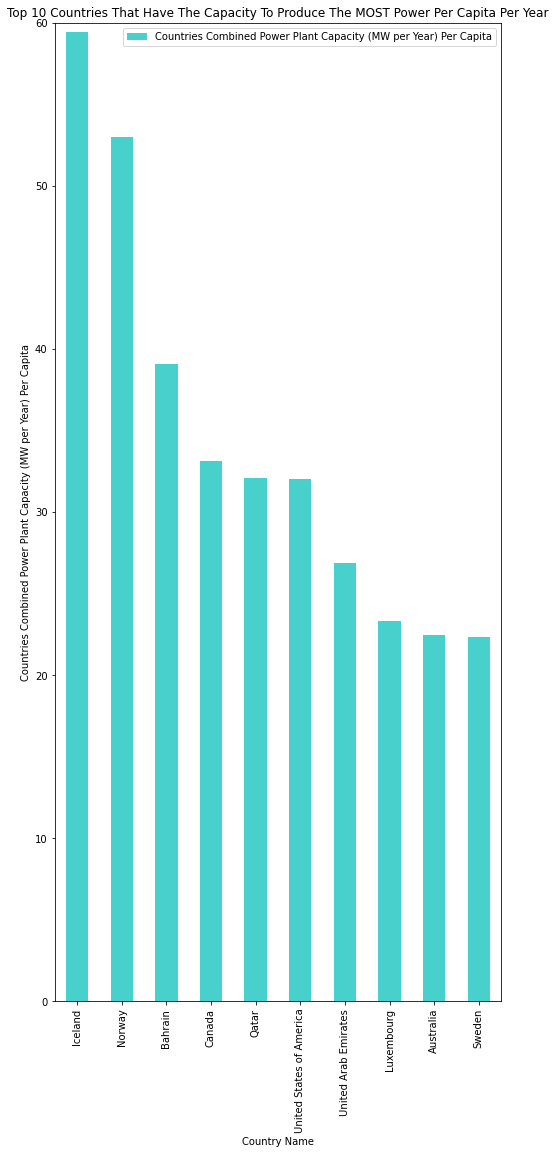

In [263]:
top_producing_countries.plot(x="Country Name", y="Countries Combined Power Plant Capacity (MW per Year) Per Capita", kind="bar", figsize=(8,18), color='mediumturquoise', title="Top 10 Countries That Have The Capacity To Produce The MOST Power Per Capita Per Year")
plt.ylabel("Countries Combined Power Plant Capacity (MW per Year) Per Capita")
plt.ylim(0, 60)

Find the top 10 Countries that have the capacity to produce the LEAST power per capita

In [216]:
# Sort the country_power_capacity_per_capita_df by the values in the 'Countries Combined Power Plant Capacity (MW per Year) Per Capita' column to find the top 10 power producing Countries
bottom_producing_countries = country_power_capacity_per_capita_df.sort_values('Countries Combined Power Plant Capacity (MW per Year) Per Capita', ascending=True)

# Reset index
bottom_producing_countries = bottom_producing_countries.reset_index(drop=True)

# Cap the dataframe at 10 countries
bottom_producing_countries = bottom_producing_countries.head(10)

bottom_producing_countries

,Country Name,Country Code,Country Status,GNI,Population,Countries Combined Power Plant Capacity (MW per Year),Countries Combined Power Plant Capacity (MW per Year) Per Capita
0,Palestine,PSE,Developing,3710.0,4803269.0,66576.00,0.014
1,Burundi,BDI,Developing,230.0,11890781.0,500809.20,0.042
2,Benin,BEN,Developing,1280.0,12123198.0,529980.00,0.044
3,Central African Republic,CAF,Developing,500.0,4829764.0,294896.64,0.061
4,Niger,NER,Developing,550.0,24206636.0,1464672.00,0.061
5,Afghanistan,AFG,Developing,500.0,38928341.0,2632818.00,0.068
6,Suriname,SUR,Developing,4620.0,586634.0,43800.00,0.075
7,Guinea-Bissau,GNB,Developing,760.0,1967998.0,159756.12,0.081
8,Burkina Faso,BFA,Developing,770.0,20903278.0,2008720.56,0.096
9,Madagascar,MDG,Developing,470.0,27691019.0,3152986.80,0.114


(0.0, 60.0)

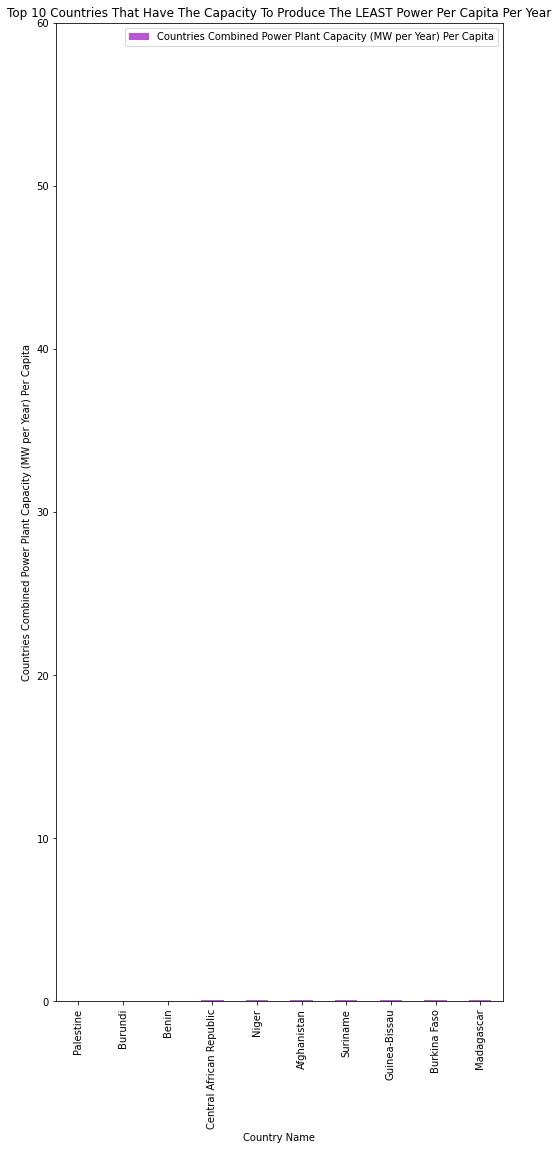

In [267]:
bottom_producing_countries.plot(x="Country Name", y="Countries Combined Power Plant Capacity (MW per Year) Per Capita", kind="bar", figsize=(8,18), color='mediumorchid', title="Top 10 Countries That Have The Capacity To Produce The LEAST Power Per Capita Per Year")
plt.ylabel("Countries Combined Power Plant Capacity (MW per Year) Per Capita")
plt.ylim(0, 60)

Text(0, 0.5, 'Countries Combined Power Plant Capacity (MW per Year) Per Capita')

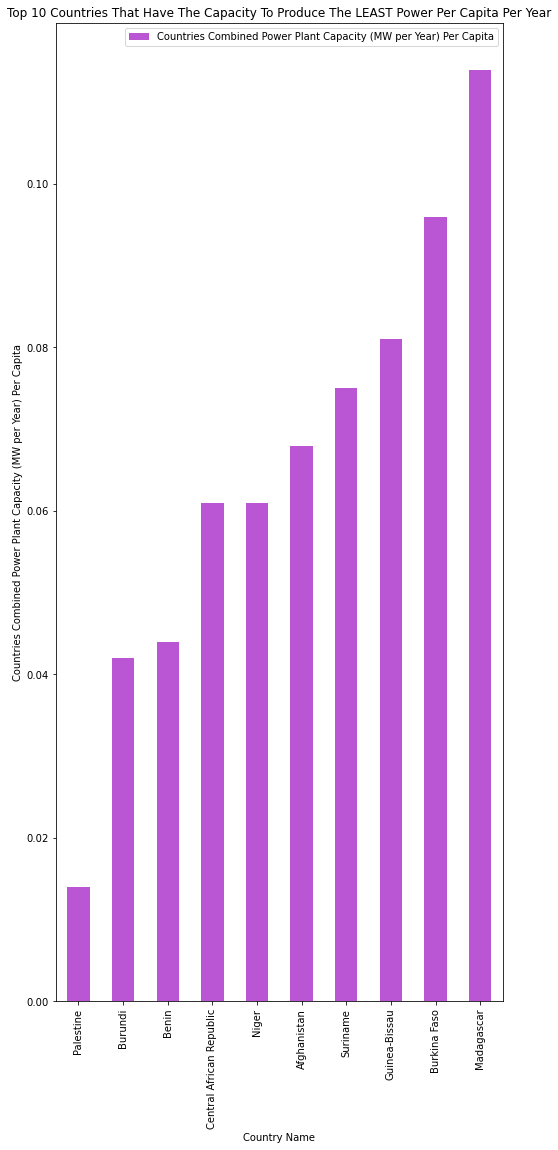

In [268]:
bottom_producing_countries.plot(x="Country Name", y="Countries Combined Power Plant Capacity (MW per Year) Per Capita", kind="bar", figsize=(8,18), color='mediumorchid', title="Top 10 Countries That Have The Capacity To Produce The LEAST Power Per Capita Per Year")
plt.ylabel("Countries Combined Power Plant Capacity (MW per Year) Per Capita")

What percentage of countries are developed vs developing?

Text(0.5, 1.0, 'Percentage of Developed Countries vs Developing Countries in the United Nations dataset')

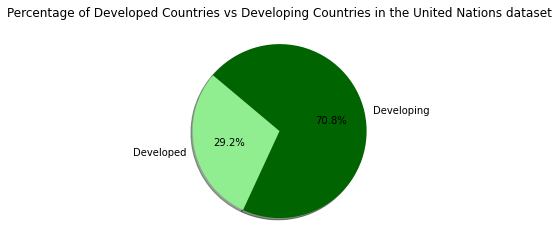

In [233]:
# Generate a pie plot showing the distribution of developed versus developing countries in the dataset

number_of_developed_countries = len(country_power_capacity_per_capita_df.loc[country_power_capacity_per_capita_df["Country Status"] == "Developed"])
number_of_developed_countries

number_of_developing_countries = len(country_power_capacity_per_capita_df.loc[country_power_capacity_per_capita_df["Country Status"] == "Developing"])
number_of_developing_countries

# Labels for the sections of our pie chart
labels = ["Developed", "Developing"]

# The values of each section of the pie chart
sizes = [number_of_developed_countries, number_of_developing_countries]

# The colors of each section of the pie chart
colors = ["lightgreen", "darkgreen"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Developed Countries vs Developing Countries in the United Nations dataset")

Furthermore, what percentage of the population lives in a developed Country, vs lives in a developing Country?

In [242]:
# Group the data by the Country Code to get a total number of people living in developed countries vs developing countries

# Reduce the table to just the necessary columns
population_distribution_df = country_power_capacity_per_capita_df[["Country Status", "Population"]]

# Group by "Country Status"
population_distribution_df = population_distribution_df.groupby(["Country Status"], as_index=False)

# Get the total number of people living in developed countries vs developing countries
population_distribution_df = population_distribution_df.sum()

population_distribution_df

,Country Status,Population
0,Developing,6.362254e+09
1,Developed,1.172255e+09


In [244]:
# THIS HAS AN ERROR
# # Generate a pie plot showing the distribution of developed versus developing countries in the dataset

# number_of_people_living_in_developed_countries = (sum(population_distribution_df.loc[population_distribution_df["Country Status"] == "Developed"]))
# number_of_people_living_in_developed_countries

# number_of_people_living_in_developing_countries = (sum(population_distribution_df.loc[population_distribution_df["Country Status"] == "Developing"]))
# number_of_people_living_in_developing_countries

# # Labels for the sections of our pie chart
# labels = ["Developed", "Developing"]

# # The values of each section of the pie chart
# sizes = [number_of_people_living_in_developed_countries, number_of_people_living_in_developing_countries]

# # The colors of each section of the pie chart
# colors = ["lightblue", "darkblue"]

# # Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
# plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# plt.title("Percentage of People Living in Developed Countries vs Developing Countries in the United Nations dataset")

Is there a relationship between GNI and power capacity per capita per year?

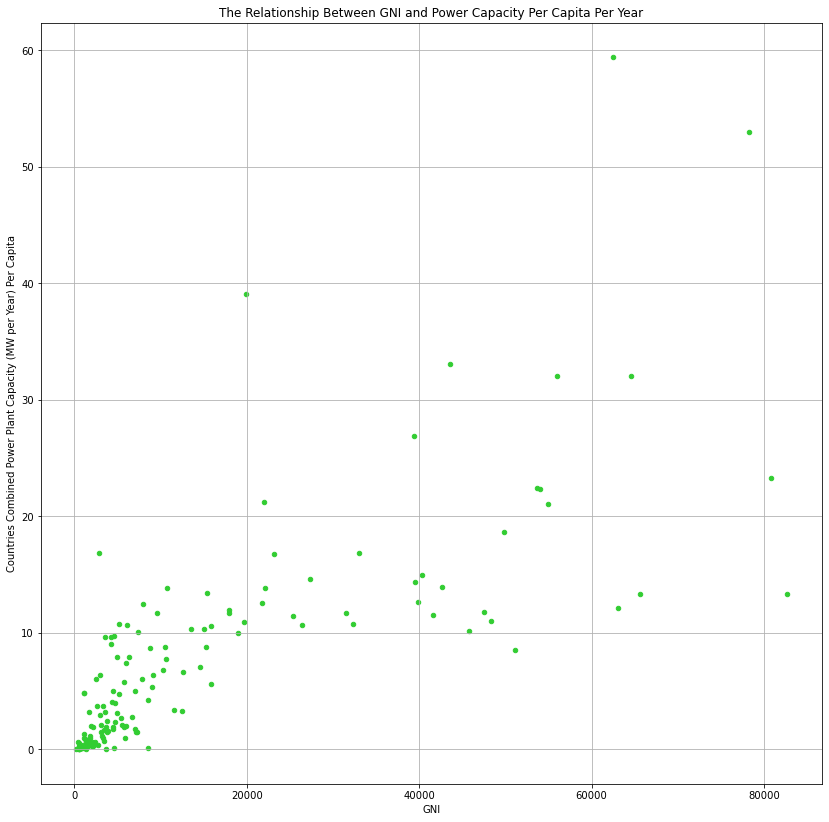

In [254]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
country_power_capacity_per_capita_df.plot(kind="scatter", x="GNI", y="Countries Combined Power Plant Capacity (MW per Year) Per Capita", 
grid=True, figsize=(14,14), color='limegreen', title="The Relationship Between GNI and Power Capacity Per Capita Per Year")

## OKAY SO i want to crfeate bins based on the interquartile range of the mean of all the data, and see what percentage of developed countries occupy the top quartile

## Notes for the data story ##

What can you do with a megawatt-hour of electricity?
(https://www.freeingenergy.com/what-is-a-megawatt-hour-of-electricity-and-what-can-you-do-with-it/)

    Power the average American home for 1.2 months.
    Drive an electric vehicle 3,600 miles.
    Power two 60-watt lightbulbs non-stop for a year.
    Smelt 137 pounds of aluminum.
    Toast 89,000 slices of bread.
    Run an average home pool pump for 5 months.


What can you run on 1 kWh?
(https://www.novec.com/Save/1-kWh.cfm)

    Blend 200 smoothies.
    Microwave 21 frozen burritos.
    Trim 3 miles of weeds.
    Make 60 quarts of ice cream.
    Keep cool with 20 hours of a ceiling fan.
    Binge watch 3 hours of television on a plasma TV or 6 hours on an LCD TV.
    Blow-dry 20 heads of hair.
    Toast 160 slices of bread.


QUICK MATHS: One megawatt (MW) = 1,000 kilowatts 